In [49]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [50]:
# reading the dataframe
df = pd.read_csv('HTTPS-clf-dataset.csv')

In [51]:
df.head()

,Unnamed: 0,BYTES,BYTES_REV,PACKETS,PACKETS_REV,TYPE,DBI_BRST_BYTES,DBI_BRST_PACKETS,PKT_LENGTHS,PPI_PKT_DIRECTIONS,...,BRST_PACKETS_0,BRST_PACKETS_1,BRST_PACKETS_2,BRST_PACKETS_3,BRST_PACKETS_4,BRST_PACKETS_5,BRST_PACKETS_6,BRST_PACKETS_7,BRST_PACKETS_8,BRST_PACKETS_9
0,0,57363.0,12066294.0,1199.0,9548.0,L,[11684362],[9543],[ 517 1300 1300 906 64 1300 178 200 30 ...,[ 1 -1 -1 -1 1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 ...,...,9543,0,0,0,0,0,0,0,0,0
1,1,779698.0,38492555.0,14539.0,28466.0,L,[37012315],[28446],[ 203 1368 1368 469 93 195 1166 207 1368 ...,[ 1 -1 -1 -1 1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 ...,...,28446,0,0,0,0,0,0,0,0,0
2,2,278099.0,43349394.0,4624.0,28939.0,L,[25835232 3228530 1571739 3201768 1601221 ...,[17863 2232 1087 2214 1107 2224 1096 1109],[ 517 1448 1448 610 64 1315 197 1448 1448 ...,[ 1 -1 -1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,...,17863,2232,1087,2214,1107,2224,1096,1109,0,0
3,3,143766.0,16941036.0,2252.0,11364.0,L,[1719683 864661 861008 854885 898346 8198...,[1205 599 598 592 623 569 592 600 591 ...,[ 517 1448 1448 305 93 51 1302 1302 207 ...,[ 1 -1 -1 -1 1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 ...,...,1205,599,598,592,623,569,592,600,591,597
4,4,1790845.0,115404196.0,37979.0,77255.0,L,[1003845 649254 763458 781127 742554 7589...,[691 446 524 537 511 522 552 461 509 537 492 5...,[ 517 1460 1460 586 64 1378 200 1460 1460 ...,[ 1 -1 -1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,...,691,446,524,537,511,522,552,461,509,537


In [52]:
df.columns

Index(['Unnamed: 0', 'BYTES', 'BYTES_REV', 'PACKETS', 'PACKETS_REV', 'TYPE',
       'DBI_BRST_BYTES', 'DBI_BRST_PACKETS', 'PKT_LENGTHS',
       'PPI_PKT_DIRECTIONS', 'BRST_COUNT', 'REV_MORE', 'PKT_TIMES',
       'DBI_BRST_TIME_START', 'DBI_BRST_TIME_STOP', 'DBI_BRST_DURATION',
       'DBI_BRST_INTERVALS', 'PKT_LENGTHS_MEAN', 'PKT_LENGTHS_MAX',
       'PKT_LENGTHS_STD', 'PKT_LENGTHS_25', 'PKT_LENGTHS_50', 'PKT_LENGTHS_75',
       'TIME_INTERVALS', 'INTERVALS_MEAN', 'INTERVALS_MAX', 'INTERVALS_STD',
       'INTERVALS_25', 'INTERVALS_50', 'INTERVALS_75', 'BRST_BYTES_MEAN',
       'BRST_BYTES_MAX', 'BRST_BYTES_STD', 'BRST_BYTES_25', 'BRST_BYTES_50',
       'BRST_BYTES_75', 'BRST_PACKETS_MEAN', 'BRST_PACKETS_MAX',
       'BRST_PACKETS_STD', 'BRST_PACKETS_25', 'BRST_PACKETS_50',
       'BRST_PACKETS_75', 'BRST_INTERVALS_MEAN', 'BRST_INTERVALS_MAX',
       'BRST_INTERVALS_STD', 'BRST_INTERVALS_25', 'BRST_INTERVALS_50',
       'BRST_INTERVALS_75', 'BRST_DURATION_MEAN', 'BRST_DURATION_MAX',
   

### feature extraction

In [53]:
# we do not need these many columns, so we filter a few of them 

In [54]:
columns = ["BRST_BYTES_2","BRST_BYTES_1","BRST_BYTES_0","PCA_PKT_LENGTHS_1","PCA_PKT_LENGTHS_0",
          "PCA_DBI_BRST_TIME_START_1","PCA_DBI_BRST_TIME_START_0","BRST_DURATION_MEAN","BRST_INTERVALS_MEAN",
          "BRST_BYTES_MEAN","INTERVALS_75","INTERVALS_MEAN","PKT_LENGTHS_MAX","PKT_LENGTHS_MEAN",
          "BYTES_REV","BYTES","TYPE"]

In [55]:
# reading the data after filtering some columns
df = pd.read_csv('HTTPS-clf-dataset.csv',usecols=columns)

In [56]:
df.head()

,BYTES,BYTES_REV,TYPE,PKT_LENGTHS_MEAN,PKT_LENGTHS_MAX,INTERVALS_MEAN,INTERVALS_75,BRST_BYTES_MEAN,BRST_INTERVALS_MEAN,BRST_DURATION_MEAN,PCA_DBI_BRST_TIME_START_0,PCA_DBI_BRST_TIME_START_1,PCA_PKT_LENGTHS_0,PCA_PKT_LENGTHS_1,BRST_BYTES_0,BRST_BYTES_1,BRST_BYTES_2
0,57363.0,12066294.0,L,1092.500000,1300,0.001138,0.000,1.168436e+07,0.000000,9.273000,-0.064074,0.119205,4.268334,1.059109,11684362,0,0
1,779698.0,38492555.0,L,1143.300000,1368,0.002310,0.001,3.701232e+07,0.000000,33.904000,-0.064072,0.119214,4.754931,1.463868,37012315,0,0
2,278099.0,43349394.0,L,1296.766667,1448,0.001724,0.002,5.230567e+06,2.601143,0.693125,0.001421,0.114901,5.916514,0.031626,25835232,3228530,1571739
3,143766.0,16941036.0,L,1211.300000,1448,0.006345,0.001,9.171066e+05,1.987714,0.113200,0.087765,0.060846,5.314518,1.307584,1719683,864661,861008
4,1790845.0,115404196.0,L,1269.633333,1460,0.001552,0.000,7.649461e+05,1.881643,0.084400,0.069640,0.063863,5.731270,0.654670,1003845,649254,763458


In [57]:
df.columns

Index(['BYTES', 'BYTES_REV', 'TYPE', 'PKT_LENGTHS_MEAN', 'PKT_LENGTHS_MAX',
       'INTERVALS_MEAN', 'INTERVALS_75', 'BRST_BYTES_MEAN',
       'BRST_INTERVALS_MEAN', 'BRST_DURATION_MEAN',
       'PCA_DBI_BRST_TIME_START_0', 'PCA_DBI_BRST_TIME_START_1',
       'PCA_PKT_LENGTHS_0', 'PCA_PKT_LENGTHS_1', 'BRST_BYTES_0',
       'BRST_BYTES_1', 'BRST_BYTES_2'],
      dtype='object')

### data preprocessing

In [58]:
df.dtypes

BYTES                        float64
BYTES_REV                    float64
TYPE                          object
PKT_LENGTHS_MEAN             float64
PKT_LENGTHS_MAX                int64
INTERVALS_MEAN               float64
INTERVALS_75                 float64
BRST_BYTES_MEAN              float64
BRST_INTERVALS_MEAN          float64
BRST_DURATION_MEAN           float64
PCA_DBI_BRST_TIME_START_0    float64
PCA_DBI_BRST_TIME_START_1    float64
PCA_PKT_LENGTHS_0            float64
PCA_PKT_LENGTHS_1            float64
BRST_BYTES_0                   int64
BRST_BYTES_1                   int64
BRST_BYTES_2                   int64
dtype: object

In [59]:
df.TYPE.value_counts()

TYPE
W    80789
D    20393
P    12553
U    10862
M    10701
L    10373
Name: count, dtype: int64

In [60]:
# L -- Live Video Streaming, P -- Video Player, M -- Music Player, U -- File Upload, D -- File Download, W -- Website, and other traffic.

In [61]:
# convert the data type of feature TYPE from object to int
df["TYPE"] = df["TYPE"].astype("category").cat.codes

In [62]:
df.TYPE.value_counts()

TYPE
5    80789
0    20393
3    12553
4    10862
2    10701
1    10373
Name: count, dtype: int64

In [63]:
# encodings: W -> 5, D -> 0, P -> 3, U -> 4, M -> 2, L -> 1

In [64]:
df.head()

,BYTES,BYTES_REV,TYPE,PKT_LENGTHS_MEAN,PKT_LENGTHS_MAX,INTERVALS_MEAN,INTERVALS_75,BRST_BYTES_MEAN,BRST_INTERVALS_MEAN,BRST_DURATION_MEAN,PCA_DBI_BRST_TIME_START_0,PCA_DBI_BRST_TIME_START_1,PCA_PKT_LENGTHS_0,PCA_PKT_LENGTHS_1,BRST_BYTES_0,BRST_BYTES_1,BRST_BYTES_2
0,57363.0,12066294.0,1,1092.500000,1300,0.001138,0.000,1.168436e+07,0.000000,9.273000,-0.064074,0.119205,4.268334,1.059109,11684362,0,0
1,779698.0,38492555.0,1,1143.300000,1368,0.002310,0.001,3.701232e+07,0.000000,33.904000,-0.064072,0.119214,4.754931,1.463868,37012315,0,0
2,278099.0,43349394.0,1,1296.766667,1448,0.001724,0.002,5.230567e+06,2.601143,0.693125,0.001421,0.114901,5.916514,0.031626,25835232,3228530,1571739
3,143766.0,16941036.0,1,1211.300000,1448,0.006345,0.001,9.171066e+05,1.987714,0.113200,0.087765,0.060846,5.314518,1.307584,1719683,864661,861008
4,1790845.0,115404196.0,1,1269.633333,1460,0.001552,0.000,7.649461e+05,1.881643,0.084400,0.069640,0.063863,5.731270,0.654670,1003845,649254,763458


In [65]:
# checking if there are any null values
df.isna().sum()

BYTES                        0
BYTES_REV                    0
TYPE                         0
PKT_LENGTHS_MEAN             0
PKT_LENGTHS_MAX              0
INTERVALS_MEAN               0
INTERVALS_75                 0
BRST_BYTES_MEAN              0
BRST_INTERVALS_MEAN          0
BRST_DURATION_MEAN           0
PCA_DBI_BRST_TIME_START_0    0
PCA_DBI_BRST_TIME_START_1    0
PCA_PKT_LENGTHS_0            0
PCA_PKT_LENGTHS_1            0
BRST_BYTES_0                 0
BRST_BYTES_1                 0
BRST_BYTES_2                 0
dtype: int64

In [66]:
# there are no null values, so we skip to the next step

In [67]:
# checking if there are any duplicates in the data
df.duplicated().sum()

np.int64(7936)

In [68]:
# we need to remove the duplicates, we used pandas.drop_duplicates
df = df.drop_duplicates()

In [69]:
df.duplicated().sum()

np.int64(0)

### model training and evaluation

In [73]:
# importing required libraries
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [71]:
## splitting the data

In [72]:
X = df.drop(["TYPE"], axis=1)
y = df["TYPE"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(x_train.shape, x_test.shape)

(123961, 16) (13774, 16)


In [74]:
#standard scaling for normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [75]:
# 1. Logistic Regression

In [76]:
lr = LogisticRegression(multi_class="multinomial")
lr.fit(x_train_norm, y_train)

LogisticRegression(multi_class='multinomial')

In [77]:
lr_score = lr.score(x_test_norm, y_test)
print("ACCURACY:", lr_score)
print("Classification report for test set")
predicts = lr.predict(x_test_norm)
print(classification_report(y_test, predicts))

ACCURACY: 0.851749673297517
Classification report for test set
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1869
           1       0.58      0.47      0.52      1050
           2       0.60      0.40      0.48      1058
           3       0.76      0.80      0.78      1253
           4       0.99      0.99      0.99       693
           5       0.98      0.99      0.98      7851

    accuracy                           0.85     13774
   macro avg       0.75      0.73      0.73     13774
weighted avg       0.85      0.85      0.85     13774



In [78]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [79]:
import matplotlib.pyplot as plt


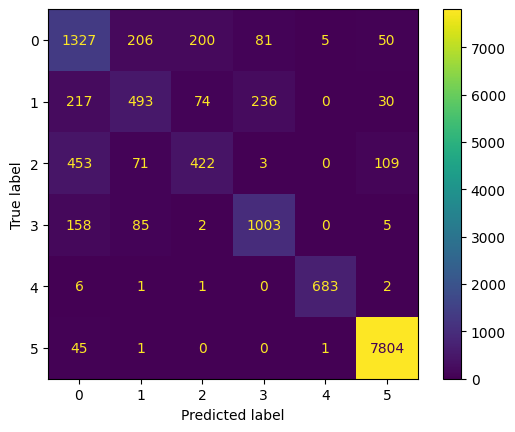

In [80]:
cm = confusion_matrix(y_test,predicts)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()

In [81]:
# 2. Decision Tree classifier

In [82]:
dc = DecisionTreeClassifier()
dc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

In [83]:
dc_score = dc.score(x_test_norm, y_test)
print("ACCURACY:", dc_score)
print("Classification report for test set")
predicts = dc.predict(x_test_norm)
print(classification_report(y_test, predicts))

ACCURACY: 0.9815594598518949
Classification report for test set
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1869
           1       0.95      0.93      0.94      1050
           2       0.95      0.95      0.95      1058
           3       0.96      0.97      0.96      1253
           4       0.99      1.00      1.00       693
           5       1.00      1.00      1.00      7851

    accuracy                           0.98     13774
   macro avg       0.97      0.97      0.97     13774
weighted avg       0.98      0.98      0.98     13774



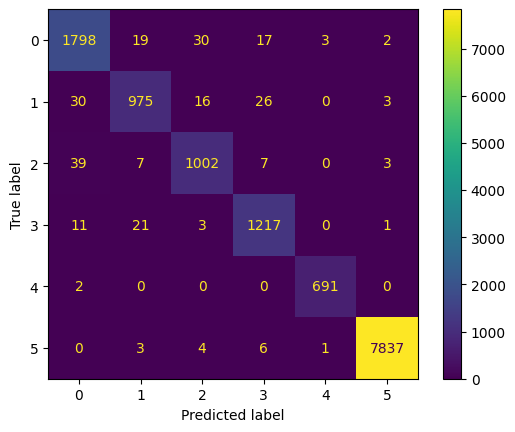

In [84]:
cm = confusion_matrix(y_test,predicts)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dc.classes_)
disp.plot()

In [85]:
# 3. Random forest regression

In [86]:
rbc = RandomForestClassifier()
rbc.fit(x_train, y_train)

RandomForestClassifier()

In [87]:
rbc_score = rbc.score(x_test, y_test)
print("ACCURACY:", rbc_score)
print("Classification report for test set")
predicts = rbc.predict(x_test)
print(classification_report(y_test, predicts))

ACCURACY: 0.9912153332365325
Classification report for test set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1869
           1       0.99      0.97      0.98      1050
           2       0.99      0.95      0.97      1058
           3       0.98      0.99      0.98      1253
           4       0.99      1.00      1.00       693
           5       1.00      1.00      1.00      7851

    accuracy                           0.99     13774
   macro avg       0.99      0.98      0.98     13774
weighted avg       0.99      0.99      0.99     13774



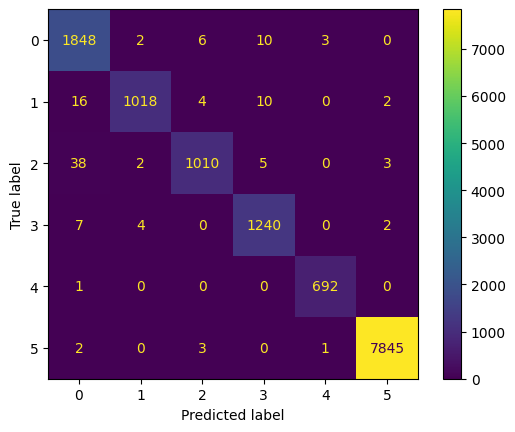

In [88]:
cm = confusion_matrix(y_test,predicts)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dc.classes_)
disp.plot()

### models comparision

In [89]:
import matplotlib.pyplot as plt

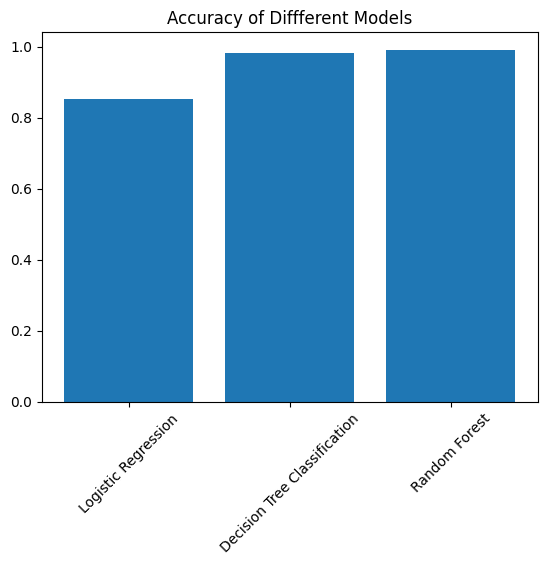

In [90]:
result = {"Logistic Regression": lr_score,
         "Decision Tree Classification": dc_score,
         "Random Forest": rbc_score,}

plt.bar(result.keys(), result.values())
plt.xticks(rotation=45)
plt.title("Accuracy of Diffferent Models")
plt.show()

In [91]:
# now we will try to predict with custom inputs for highest accuracy model (random forest)

In [92]:
BYTES = 57363.0
BYTES_REV = 12066294.0
PKT_LENGTHS_MEAN = 1092.5
PKT_LENGTHS_MAX = 1300
INTERVALS_MEAN = 0.001138
INTERVALS_75 = 0.0
BRST_BYTES_MEAN = 11684362.0
BRST_INTERVALS_MEAN = 0.0
BRST_DURATION_MEAN = 9.273
PCA_DBI_BRST_TIME_START_0 = 0.064074
PCA_DBI_BRST_TIME_START_1 = 0.119205
PCA_PKT_LENGTHS_0 = 4.268334
PCA_PKT_LENGTHS_1 = 1.059109
BRST_BYTES_0 = 11684362
BRST_BYTES_1 = 0
BRST_BYTES_2 = 0

In [96]:
custom_input = [[
    BYTES,
    BYTES_REV,
    PKT_LENGTHS_MEAN,
    PKT_LENGTHS_MAX,
    INTERVALS_MEAN,
    INTERVALS_75,
    BRST_BYTES_MEAN,
    BRST_INTERVALS_MEAN,
    BRST_DURATION_MEAN,
    PCA_DBI_BRST_TIME_START_0,
    PCA_DBI_BRST_TIME_START_1,
    PCA_PKT_LENGTHS_0,
    PCA_PKT_LENGTHS_1,
    BRST_BYTES_0,
    BRST_BYTES_1,
    BRST_BYTES_2
]]

In [97]:
# expected value for that custom input = TYPE = 1(L -- Live Video Streaming)

In [98]:
rbc.predict(custom_input)

array([1], dtype=int8)

In [99]:
# so our model is predict correctly for the custom data as well